# 环境配置

In [35]:
import warnings

warnings.filterwarnings("ignore")

import seaborn as sns
from pandas import read_csv
from pandas import set_option
from scipy.stats import norm
import matplotlib.pyplot as plt
from toad.detector import detect

set_option("display.width", 10000)
set_option("display.max_rows", None)
set_option("display.max_columns", None)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

# 加载数据

In [5]:
data = read_csv("../data/Telco-Customer-Churn.csv", encoding="utf-8")

## 转换类型

In [9]:
data["TotalCharges"] = data["TotalCharges"].apply(lambda x: "0" if x == " " else x)
data["TotalCharges"] = data["TotalCharges"].astype(float)

# 数据探索

## 查看数据

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 基本属性

In [11]:
detect(data).iloc[:, :4]

,type,size,missing,unique
customerID,object,7043,0.00%,7043
gender,object,7043,0.00%,2
SeniorCitizen,int64,7043,0.00%,2
Partner,object,7043,0.00%,2
Dependents,object,7043,0.00%,2
tenure,int64,7043,0.00%,73
PhoneService,object,7043,0.00%,2
MultipleLines,object,7043,0.00%,3
InternetService,object,7043,0.00%,3
OnlineSecurity,object,7043,0.00%,3


## 分离数据

In [15]:
nums = ["MonthlyCharges", "TotalCharges"]
objs = ["SeniorCitizen", 'gender', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 
        'StreamingTV', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod']
num_data = data[nums].join(data[["tenure", "Churn"]])
obj_data = data[objs].join(data[["tenure", "Churn"]])

# 特征探索

## 数值型特征

偏度（Skewness）
用来描述数据分布的对称性，正态分布的偏度为0。计算数据样本的偏度，当偏度<0时，称为负偏，数据出现左侧长尾；当偏度>0时，称为正偏，数据出现右侧长尾；当偏度为0时，表示数据相对均匀的分布在平均值两侧，不一定是绝对的对称分布，此时要与正态分布偏度为0的情况进行区分。
当偏度绝对值过大时，长尾的一侧出现极端值的可能性较高。  
峰度(Kurtosis)
用来描述数据分布陡峭或是平滑的情况。正态分布的峰度为3，峰度越大，代表分布越陡峭，尾部越厚；峰度越小，分布越平滑。很多情况下，为方便计算，将峰度值－3，因此正态分布的峰度变为0，方便比较。
在方差相同的情况下，峰度越大，存在极端值的可能性越高。

### MonthlyCharges（月费用）

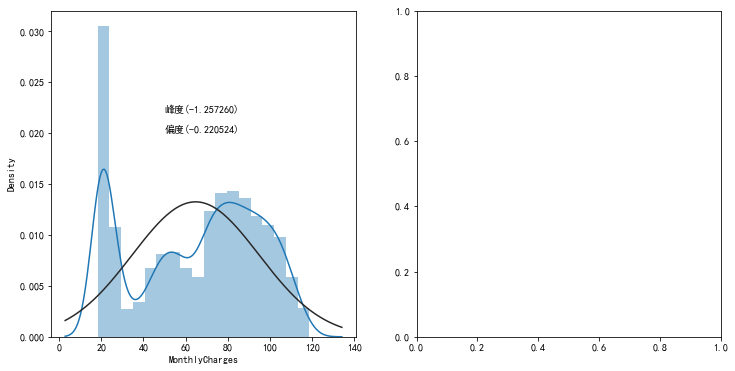

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(num_data["MonthlyCharges"], fit=norm)
for i, j, z in zip([num_data["MonthlyCharges"].skew(), num_data["MonthlyCharges"].kurt()], [0.02, 0.022], ["偏度", "峰度"]):
    plt.text(50, j, "{}({:4f})".format(z, i))

plt.subplot(1, 2, 2)


In [21]:
num_data["MonthlyCharges"].skew()

-0.22052443394398033

In [22]:
num_data["MonthlyCharges"].kurt()

-1.2572596945495056

### TotalCharges（总费用）

## 字符型特征

### SeniorCitizen（是否是老年人）

### gender（性别）

### Partner（是否单身）

### Dependents（经济是否独立）

### PhoneService（电话业务）

### MultipleLines（多线业务）

### InternetService（网络服务业务）

### OnlineSecurity（网络安全业务）

### OnlineBackup（网络备份业务）

### DeviceProtection（设备保护业务）

### TechSupport（技术支持业务）

### StreamingTV（网络电视业务）

### StreamingMovies（网络电影业务）

### Contract（合同方式）


### PaperlessBilling（电子账单）

### PaymentMethod（支付方式）